In [228]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import cvxopt as opt
from cvxopt import matrix, spmatrix, sparse
from cvxopt.solvers import qp, options
from cvxopt import blas


In [216]:
sto_index_sets = []
sto_index_test_sets =[]
datasets_X_S =[]
datasets_y =[]
gram_gaussian_set =[]
gram_gaussian_test_set = []
gram_zz_kernel_set = []
gram_zz_kernel_test_set = [] 
gram_kernel_set = []
gram_kernel_test_set = []

for i in range(5):
    sto_index_sets += [pd.read_csv("svm_data/sto_index_sets"+str(i)+".csv").iloc[:,1].tolist()]
    sto_index_test_sets += [pd.read_csv("svm_data/sto_index_test_sets"+str(i)+".csv").iloc[:,1].tolist()]
    datasets_X_S += [pd.read_csv("svm_data/datasets_X_S"+str(i)+".csv").iloc[:,1:].values.tolist()]
    datasets_y += [pd.read_csv("svm_data/datasets_y"+str(i)+".csv").iloc[:,1].values.tolist()]
    
    gram_gaussian_set += [pd.read_csv("svm_data/gram_gaussian_"+str(i)+".csv").iloc[:,1:].values.tolist()]
    gram_gaussian_test_set += [pd.read_csv("svm_data/gram_gaussian_test"+str(i)+".csv").iloc[:,1:].values.tolist()]
    gram_zz_kernel_set += [pd.read_csv("svm_data/gram_zz_kernel"+str(i)+".csv").iloc[:,1:].values.tolist()]
    gram_zz_kernel_test_set += [pd.read_csv("svm_data/gram_zz_kernel_test"+str(i)+".csv").iloc[:,1:].values.tolist()]
    gram_kernel_set += [pd.read_csv("svm_data/gram_kernel"+str(i)+".csv").iloc[:,1:].values.tolist()]
    gram_kernel_test_set += [pd.read_csv("svm_data/gram_kernel_test"+str(i)+".csv").iloc[:,1:].values.tolist()]

In [217]:
y_pred_train = []
y_pred_test = []
c_sol = []
kernel_set = gram_gaussian_set
kernel_test_set = gram_gaussian_test_set

for i in range(5):
    sto_ind = sto_index_sets[i]
    data_sto_y =pd.DataFrame(datasets_y[i]).iloc[sto_ind,:]
    y_s = 2*(data_sto_y.T-0.5).values[0]
    diag_y = np.diag(y_s)

    sto_ind = sto_index_test_sets[i]
    data_sto_test_y =pd.DataFrame(datasets_y[i]).iloc[sto_ind,:]
    y_s_t= 2*(data_sto_test_y.T-0.5).values[0]
    diag_y_t = np.diag(y_s_t)

    kernel_matrix = kernel_set[i]
    kernel_test_matrix = kernel_test_set[i]

    y_train = 2*(data_sto_y.T-0.5).values[0]

    n = len(kernel_matrix)
    m = len(kernel_test_matrix[0])
    lamda = 1
    upbound = 2*n*lamda
    
    # Generate random vector r and symmetric definite positive matrix Q
    Q = matrix(kernel_matrix)
    r = matrix(np.array([-1.0 for i in range(n)]))

    # Add constraint matrices and vectors
    G = matrix(np.concatenate([-np.eye(n),np.eye(n)]))
    h = matrix([0.0 for i in range(n)] + [upbound**(-1) for i in range(n)])
    A = matrix(y_train).T
    b = matrix(0.0)

    # Solve
    sol = qp(Q,-r,G,h,A,b, kktsolver='ldl', options={'kktreg':1e-9})

    c_sol += [sol["x"]]
    c_temp = [i for i in c_sol[0]]

    y_pred_train += [np.sign(np.matmul((c_temp * y_s),kernel_matrix))]
    y_pred_test += [np.sign(np.matmul((c_temp * y_s),kernel_test_matrix))]

     pcost       dcost       gap    pres   dres
 0: -1.7476e+00 -1.9394e+00  2e+02  1e+01  4e-11
 1: -1.6000e+00 -1.4745e+00  1e+01  8e-01  2e-11
 2: -1.8329e-01 -4.2663e-01  1e+00  6e-02  3e-11
 3:  2.7683e-02 -1.3290e-01  2e-01  2e-10  3e-12
 4:  1.8202e-03 -2.1998e-03  4e-03  5e-11  3e-13
 5:  1.8228e-05 -2.2007e-05  4e-05  6e-11  3e-14
 6:  1.8228e-07 -2.2007e-07  4e-07  6e-11  6e-16
 7:  1.8228e-09 -2.2007e-09  4e-09  6e-11  2e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.7319e+00 -1.9378e+00  2e+02  1e+01  4e-11
 1: -1.5852e+00 -1.4757e+00  1e+01  7e-01  2e-11
 2: -1.4644e-01 -4.3077e-01  1e+00  5e-02  3e-11
 3:  3.0208e-02 -1.1794e-01  1e-01  2e-10  2e-12
 4:  1.6441e-03 -1.6422e-03  3e-03  5e-11  3e-13
 5:  1.6452e-05 -1.6426e-05  3e-05  6e-11  3e-14
 6:  1.6452e-07 -1.6426e-07  3e-07  6e-11  5e-16
 7:  1.6452e-09 -1.6426e-09  3e-09  6e-11  2e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.7970e+00 -1.9765e

In [218]:
train_result = []
test_result = []

for i in range(5) : 
    sto_ind = sto_index_sets[i]
    data_sto_y =pd.DataFrame(datasets_y[i]).iloc[sto_ind,:]
    train_result += [sum((y_pred_train[i]==2*(data_sto_y-0.5).T.values)[0])/n]

for i in range(5) : 
    sto_ind = sto_index_test_sets[i]
    data_sto_y =pd.DataFrame(datasets_y[i]).iloc[sto_ind,:]
    test_result += [sum((y_pred_test[i]==2*(data_sto_y-0.5).T.values)[0])/m]
    
result = pd.DataFrame([train_result,test_result])
result.index = ["Train Score","Test Score"]
result.columns = ["Data Set 1","Data Set 2","Data Set 3","Data Set 4","Data Set 5"]
result
gaussian_kernel_result= result

In [219]:
y_pred_train = []
y_pred_test = []
c_sol = []
kernel_set = gram_zz_kernel_set
kernel_test_set = gram_zz_kernel_test_set 

for i in range(5):
    sto_ind = sto_index_sets[i]
    data_sto_y =pd.DataFrame(datasets_y[i]).iloc[sto_ind,:]
    y_s = 2*(data_sto_y.T-0.5).values[0]
    diag_y = np.diag(y_s)

    sto_ind = sto_index_test_sets[i]
    data_sto_test_y =pd.DataFrame(datasets_y[i]).iloc[sto_ind,:]
    y_s_t= 2*(data_sto_test_y.T-0.5).values[0]
    diag_y_t = np.diag(y_s_t)

    kernel_matrix = kernel_set[i]
    kernel_test_matrix = kernel_test_set[i]

    y_train = 2*(data_sto_y.T-0.5).values[0]

    n = len(kernel_matrix)
    m = len(kernel_test_matrix[0])
    lamda = 1
    upbound = 2*n*lamda
    
    # Generate random vector r and symmetric definite positive matrix Q
    Q = matrix(kernel_matrix)
    r = matrix(np.array([-1.0 for i in range(n)]))

    # Add constraint matrices and vectors
    G = matrix(np.concatenate([-np.eye(n),np.eye(n)]))
    h = matrix([0.0 for i in range(n)] + [upbound**(-1) for i in range(n)])
    A = matrix(y_train).T
    b = matrix(0.0)

    # Solve
    sol = qp(Q,-r,G,h,A,b, kktsolver='ldl', options={'kktreg':1e-9})

    c_sol += [sol["x"]]
    c_temp = [i for i in c_sol[0]]

    y_pred_train += [np.sign(np.matmul((c_temp * y_s),kernel_matrix))]
    y_pred_test += [np.sign(np.matmul((c_temp * y_s),kernel_test_matrix))]

     pcost       dcost       gap    pres   dres
 0: -3.5899e+00 -3.0188e+00  2e+02  1e+01  8e-11
 1: -2.9336e+00 -1.7721e+00  1e+01  1e+00  3e-11
 2:  2.0496e-01 -4.5550e-01  7e-01  3e-10  6e-11
 3:  8.1587e-02 -2.3831e-02  1e-01  1e-10  6e-12
 4:  1.0643e-03 -1.4582e-03  3e-03  4e-11  1e-12
 5:  1.0649e-05 -1.4582e-05  3e-05  6e-11  2e-14
 6:  1.0649e-07 -1.4582e-07  3e-07  6e-11  4e-16
 7:  1.0649e-09 -1.4582e-09  3e-09  6e-11  2e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -3.4788e+00 -2.9673e+00  2e+02  1e+01  8e-11
 1: -2.8929e+00 -1.7693e+00  1e+01  9e-01  3e-11
 2:  2.3439e-01 -4.4058e-01  7e-01  2e-10  6e-11
 3:  9.8641e-02 -4.1103e-02  1e-01  9e-11  7e-12
 4:  2.0125e-03 -4.0909e-03  6e-03  4e-11  1e-12
 5:  2.0249e-05 -4.0927e-05  6e-05  6e-11  4e-14
 6:  2.0249e-07 -4.0927e-07  6e-07  6e-11  6e-16
 7:  2.0249e-09 -4.0927e-09  6e-09  6e-11  2e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -3.3631e+00 -2.8441e

In [220]:
train_result = []
test_result = []

for i in range(5) : 
    sto_ind = sto_index_sets[i]
    data_sto_y =pd.DataFrame(datasets_y[i]).iloc[sto_ind,:]
    train_result += [sum((y_pred_train[i]==2*(data_sto_y-0.5).T.values)[0])/n]

for i in range(5) : 
    sto_ind = sto_index_test_sets[i]
    data_sto_y =pd.DataFrame(datasets_y[i]).iloc[sto_ind,:]
    test_result += [sum((y_pred_test[i]==2*(data_sto_y-0.5).T.values)[0])/m]
    
result = pd.DataFrame([train_result,test_result])
result.index = ["Train Score","Test Score"]
result.columns = ["Data Set 1","Data Set 2","Data Set 3","Data Set 4","Data Set 5"]
result
zz_kernel_result = result

In [221]:
y_pred_train = []
y_pred_test = []
c_sol = []
kernel_set = gram_kernel_set
kernel_test_set = gram_kernel_test_set 

for i in range(5):
    sto_ind = sto_index_sets[i]
    data_sto_y =pd.DataFrame(datasets_y[i]).iloc[sto_ind,:]
    y_s = 2*(data_sto_y.T-0.5).values[0]
    diag_y = np.diag(y_s)

    sto_ind = sto_index_test_sets[i]
    data_sto_test_y =pd.DataFrame(datasets_y[i]).iloc[sto_ind,:]
    y_s_t= 2*(data_sto_test_y.T-0.5).values[0]
    diag_y_t = np.diag(y_s_t)

    kernel_matrix = kernel_set[i]
    kernel_test_matrix = kernel_test_set[i]

    y_train = 2*(data_sto_y.T-0.5).values[0]

    n = len(kernel_matrix)
    m = len(kernel_test_matrix[0])
    lamda = 1
    upbound = 2*n*lamda
    
    # Generate random vector r and symmetric definite positive matrix Q
    Q = matrix(kernel_matrix)
    r = matrix(np.array([-1.0 for i in range(n)]))

    # Add constraint matrices and vectors
    G = matrix(np.concatenate([-np.eye(n),np.eye(n)]))
    h = matrix([0.0 for i in range(n)] + [upbound**(-1) for i in range(n)])
    A = matrix(y_train).T
    b = matrix(0.0)

    # Solve
    sol = qp(Q,-r,G,h,A,b, kktsolver='ldl', options={'kktreg':1e-9})

    c_sol += [sol["x"]]
    c_temp = [i for i in c_sol[0]]
    y_pred_train += [np.sign(np.matmul((c_temp * y_s),kernel_matrix))]
    y_pred_test += [np.sign(np.matmul((c_temp * y_s),kernel_test_matrix))]

     pcost       dcost       gap    pres   dres
 0: -3.4835e+00 -2.9776e+00  2e+02  1e+01  8e-11
 1: -2.9093e+00 -1.7619e+00  1e+01  1e+00  3e-11
 2:  2.4425e-01 -4.4910e-01  7e-01  3e-03  6e-11
 3:  1.2258e-01 -8.2170e-02  2e-01  6e-04  1e-11
 4:  5.4792e-03 -1.5057e-02  2e-02  6e-11  1e-12
 5:  5.9337e-05 -1.5131e-04  2e-04  6e-11  9e-14
 6:  5.9337e-07 -1.5131e-06  2e-06  6e-11  2e-15
 7:  5.9337e-09 -1.5131e-08  2e-08  6e-11  2e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -3.1323e+00 -2.8023e+00  2e+02  1e+01  7e-11
 1: -2.6599e+00 -1.7493e+00  1e+01  9e-01  2e-11
 2:  1.6897e-01 -4.4642e-01  6e-01  2e-10  5e-11
 3:  6.3572e-02 -2.5935e-02  9e-02  9e-11  5e-12
 4:  8.4941e-04 -8.7913e-04  2e-03  5e-11  7e-13
 5:  8.4949e-06 -8.7911e-06  2e-05  6e-11  2e-14
 6:  8.4949e-08 -8.7911e-08  2e-07  6e-11  4e-16
 7:  8.4949e-10 -8.7911e-10  2e-09  6e-11  2e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -3.4712e+00 -2.9471e

In [222]:
train_result = []
test_result = []

for i in range(5) : 
    sto_ind = sto_index_sets[i]
    data_sto_y =pd.DataFrame(datasets_y[i]).iloc[sto_ind,:]
    train_result += [sum((y_pred_train[i]==2*(data_sto_y-0.5).T.values)[0])/n]

for i in range(5) : 
    sto_ind = sto_index_test_sets[i]
    data_sto_y =pd.DataFrame(datasets_y[i]).iloc[sto_ind,:]
    test_result += [sum((y_pred_test[i]==2*(data_sto_y-0.5).T.values)[0])/m]
    
result = pd.DataFrame([train_result,test_result])
result.index = ["Train Score","Test Score"]
result.columns = ["Data Set 1","Data Set 2","Data Set 3","Data Set 4","Data Set 5"]
custom_kernel_result = result

In [267]:
gaussian_kernel_result.index = ["Gaussian_Train","Gaussian_Test"]
zz_kernel_result.index = ["zz_kernel_Train","zz_kerenl_Test"]
custom_kernel_result.index = ["custom_kernel_Train","custom_kerenl_Test"]

result = pd.concat([gaussian_kernel_result,zz_kernel_result,custom_kernel_result])

In [249]:
plot_train = pd.DataFrame(pd.concat([gaussian_kernel_result.iloc[0,:],zz_kernel_result.iloc[0,:],custom_kernel_result.iloc[0,:]]))
plot_train.columns = ["Accuracy"]
plot_train["DataSet"] = plot_train.index
plot_train["Kernel"] = ["Gaussian Kernel" for i in range(5)]+["ZZ Kernel" for i in range(5)]+["Custom Kernel" for i in range(5)]

plot_test = pd.DataFrame(pd.concat([gaussian_kernel_result.iloc[1,:],zz_kernel_result.iloc[1,:],custom_kernel_result.iloc[1,:]]))
plot_test.columns = ["Accuracy"]
plot_test["DataSet"] = plot_test.index
plot_test["Kernel"] = ["Gaussian Kernel" for i in range(5)]+["ZZ Kernel" for i in range(5)]+["Custom Kernel" for i in range(5)]

In [ ]:
datasets_y[i]


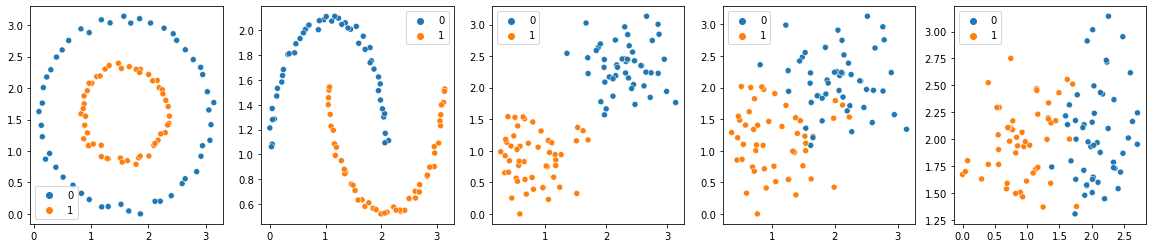

In [281]:
plt.figure(figsize = (20,4))
for i in range(5):
    plot_x = np.array(datasets_X_S[i])
    plt.subplot(1,5,i+1)
    sns.scatterplot(x=plot_x[:,0],y=plot_x[:,1],hue = datasets_y[i])


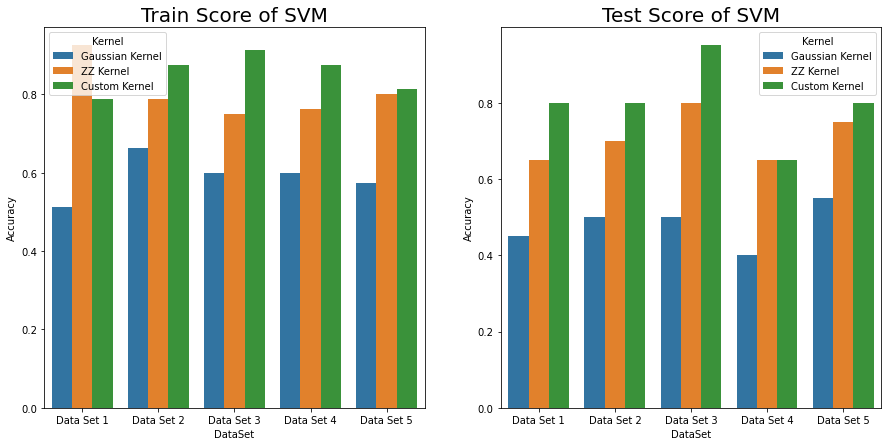

In [266]:

plt.figure(figsize = (15,7))
plt.subplot(121)
sns.barplot(data=plot_train, x="DataSet", y="Accuracy", hue="Kernel").axes.set_title(label="Train Score of SVM",fontsize=20)
plt.subplot(122)
sns.barplot(data=plot_test, x="DataSet", y="Accuracy", hue="Kernel").axes.set_title(label="Test Score of SVM",fontsize=20)
plt.show()

In [268]:
result

,Data Set 1,Data Set 2,Data Set 3,Data Set 4,Data Set 5
Gaussian_Train,0.5125,0.6625,0.6000,0.6000,0.5750
Gaussian_Test,0.4500,0.5000,0.5000,0.4000,0.5500
zz_kernel_Train,0.9250,0.7875,0.7500,0.7625,0.8000
zz_kerenl_Test,0.6500,0.7000,0.8000,0.6500,0.7500
custom_kernel_Train,0.7875,0.8750,0.9125,0.8750,0.8125
custom_kerenl_Test,0.8000,0.8000,0.9500,0.6500,0.8000
